In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.datasets import load_iris
iris = pd.read_csv('Iris.csv')

iris.drop("Id",axis=1,inplace=True)
x = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = iris['Species']

tree_model = DecisionTreeClassifier()
tree_model.fit(x,y)

tree_model.predict([[6.2, 3.4, 5.4, 2.3]])

array(['Iris-virginica'], dtype=object)

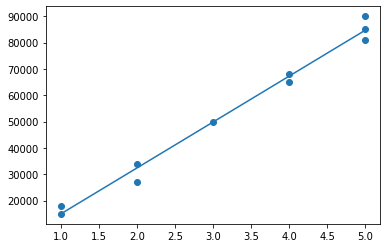

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])
#data harga rummah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

plt.scatter(bedrooms, house_price)

bedrooms = bedrooms.reshape(-1,1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

plt.plot(bedrooms, linreg.predict(bedrooms))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

df = pd.read_csv('Social_Network_Ads.csv')
data = df.drop(columns='User ID')

data = pd.get_dummies(data)
data

predictions = ['Age', 'EstimatedSalary', 'Gender_Female', 'Gender_Male']
x = data[predictions]
y = data['Purchased']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

model = linear_model.LogisticRegression()
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.63

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('Mall_Customers.csv')
# ubah nama kolom
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
# ubah data kategorik mmenjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
# tampilkan data yang sudah di preprocess
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


Text(0, 0.5, 'Inertia')

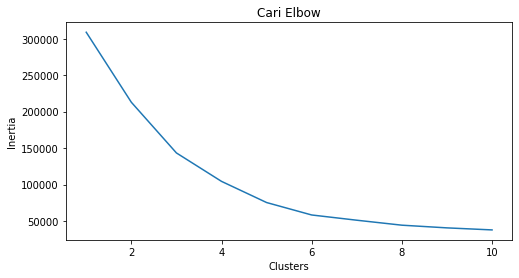

In [ ]:
from sklearn.cluster import KMeans

X = df.drop(columns=['gender', 'CustomerID'])

#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

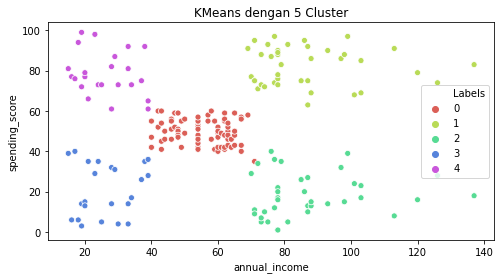

In [ ]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import datasets

iris = datasets.load_iris()
atribut = iris.data
label = iris.target
# bagi dataset menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(atribut, label, test_size=0.2)

from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
model_pertama = decision_tree.fit(X_train, y_train)
model_pertama.score(X_test, y_test)


# membuat objek PCA dengan 4 principal component
pca = PCA(n_components=4)
# mengaplikasikan PCA pada dataset
pca_attributes = pca.fit_transform(X_train)
# melihat variance dari setiap atribut
pca.explained_variance_ratio_

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

model_kedua = decision_tree.fit(X_train_pca, y_train)
model_kedua.score(X_test_pca, y_test)

1.0

In [ ]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

x = df[df.columns[:8]]
y = df['Outcome']

from sklearn.preprocessing import StandardScaler
 
# standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

from sklearn.svm import SVC

clf = SVC()
clf.fit(x_train, y_train)

clf.score(x_test, y_test)

0.7637795275590551